# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [34]:
df = pd.read_csv('../data/states_edu.csv')
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [43]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
},
    axis = 1, inplace = True)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [44]:

df['YEAR'].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [92]:
selected_states = ['MICHIGAN', 'OHIO']
selected_average = df[df['STATE'].isin(selected_states)].groupby(['STATE','YEAR'])['AVG_MATH_4_SCORE'].mean()
selected_average['MICHIGAN'] < selected_average['OHIO'] ## OHIO


YEAR
1992    False
2000     True
2003     True
2005     True
2007     True
2009     True
2011     True
2013     True
2015     True
2017     True
2019     True
Name: AVG_MATH_4_SCORE, dtype: bool

Find the average for your chosen test across all states in 2019

In [95]:
all_average = df[df['YEAR'] == 2019].groupby(['STATE','YEAR'])['AVG_MATH_4_SCORE'].mean()
all_average ## unsure if you're asking BY state or REGARDLESS of state. here is by state
all_average.mean() ## here is regardless of state

239.9433962264151

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [71]:
df.groupby(['STATE'])['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [105]:
df['TOTAL_EXPENDITURE_PER_STU'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df['PERCENT_TOWARDS_INSTRUCTION'] = (df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']) * 100
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_EXPENDITURE_PER_STU,INSTRUCTIONAL_EXPENDITURE_PER_STU,PERCENT_INSTRUCTION,PERCENT_TOWARDS_INSTRUCTION
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,2.025197,55.833300,55.833300
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,2.132082,42.212972,42.212972
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,2.184247,55.324775,55.324775
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,2.732512,52.909138,52.909138
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154,2.680986,50.307918,50.307918


Feature engineering justification: **<I figured that seeing how much money per student that the schools were recieving is good to see. Seeing if the amount of money increases or decreases with the test scores would be interesting. Then I checked to see what percent of the expenditures were being put towards instruction so see if there was any correltion with the amount allocated and test scores>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='TOTAL_EXPENDITURE_PER_STU', ylabel='AVG_MATH_4_SCORE'>

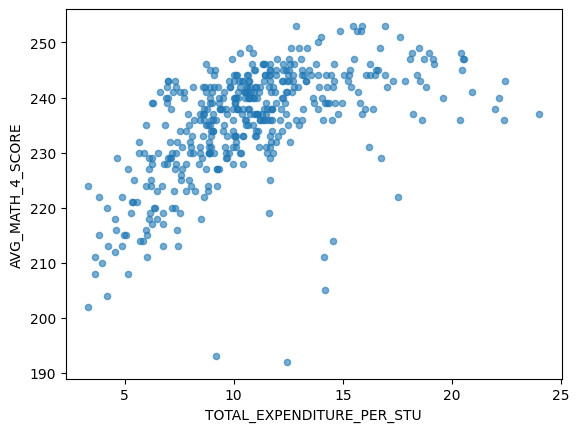

In [107]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STU', y='AVG_MATH_4_SCORE', alpha=0.6)
# plt.xlabel('Average 4th Grader Math Score')
# plt.ylabel('Expenditure per Student')

**<There is a slight trend that as total expenditure per student increases the average 4th grade math score increases>**

**Visualization 2**

<Axes: xlabel='PERCENT_TOWARDS_INSTRUCTION', ylabel='AVG_MATH_4_SCORE'>

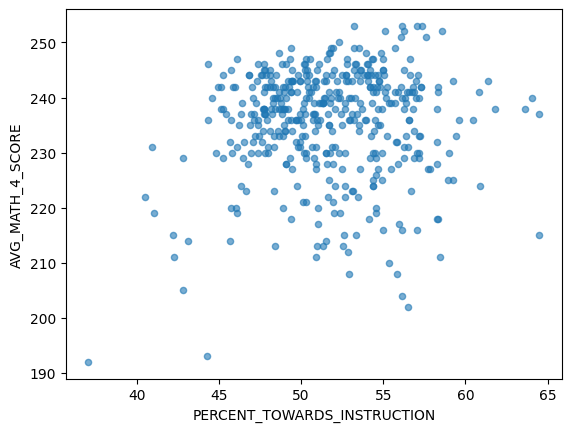

In [187]:
df.plot.scatter(x='PERCENT_TOWARDS_INSTRUCTION', y=('AVG_MATH_4_SCORE'), alpha=0.6, title='')

**<No correlation between percent of expenditure being put towards instruction and the avg math score of 4th graders>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [139]:
from sklearn.model_selection import train_test_split

In [178]:
X = df[['TOTAL_EXPENDITURE_PER_STU','PERCENT_TOWARDS_INSTRUCTION','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.mean(), inplace=True)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [180]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [181]:
# create your model here
model = LinearRegression()

In [182]:
model.fit(X_train, y_train)

LinearRegression()

In [183]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [197]:
model.score(X_test, y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

5.407680980944004

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

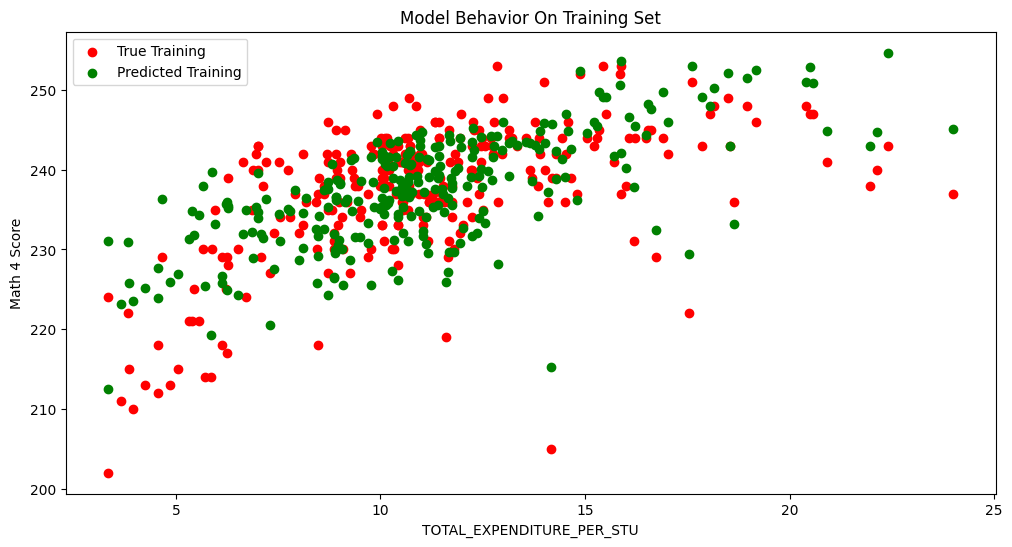

In [185]:
col_name = 'TOTAL_EXPENDITURE_PER_STU'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

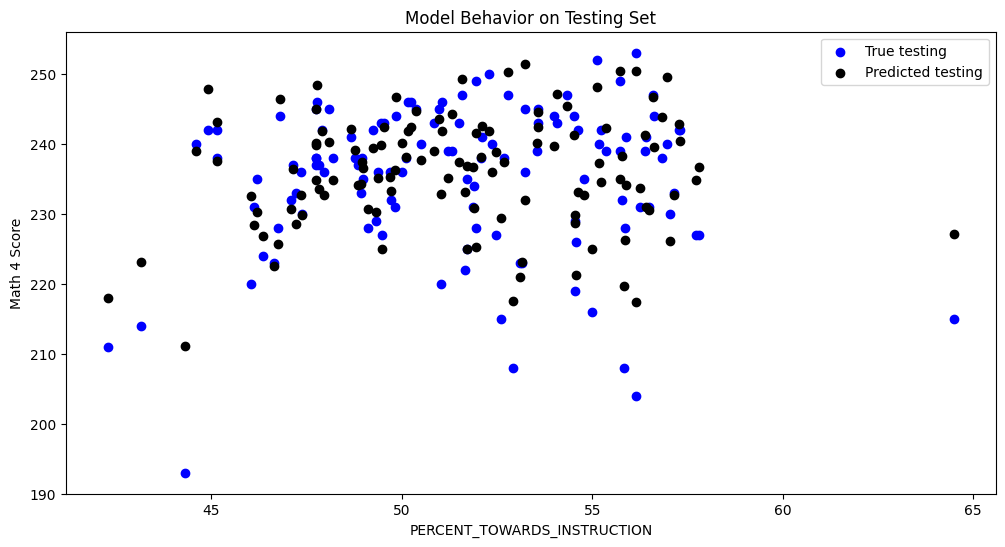

In [196]:
col_name = 'PERCENT_TOWARDS_INSTRUCTION'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<I decided to focus on the Math scores of 4th graders. I created two extra features. One calculated the expenditure per student and one calculated the what percent of those total expenditures were allocated towards instruction. From the EDA I noticed that there was a slight positive relationship between the Math scores and the total expenditures per student, but there wasn't one between the percentage allocated towards instruction and the the math scores. I decided to use EXPENDITURE_PER_STU, PERCENT_TOWARDS_INSTRUCTURE, and AVG_READING_4_SCORE with the ML Linear Regression algorithm. The model score was ~0.734 and had a mean error of ~3.989. Looking at the plots the machinese had a better time with the EXPENDITURE_PER_STU and (I checked) the AVG_READING_4_SCORE than the PERCENT_TOWARDS_INSTRUCTURE which I assumed would be the case.\>**